In [3]:
from audio_segment_preprocess.ichbi import ICHBIAudioSegmentLabel, ICHBISegmentsAnnotation
from audio_segment_preprocess.typing import WaveformSample

In [4]:
from transformers import AutoFeatureExtractor

base_model = "MIT/ast-finetuned-audioset-10-10-0.4593"
feature_extractor = AutoFeatureExtractor.from_pretrained(base_model)

/Users/miika/Work/audio_segment_preprocess/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# ICHBIAudioSegmentLabel.from_ichbi_row(annotation)
ANNOTATION = '0.878\t3.587\t0\t0\n3.587\t7.918\t1\t0\n7.918\t12.266\t1\t0\n12.266\t16.764\t1\t0\n16.764\t19.875\t1\t0'
ANNOTATION_ROWS = ANNOTATION.split("\n")
WAV_FILE = '/Users/miika/Work/llm-respiratory/ICBHI/.data/ICBHI_final_database/154_3b3_Ar_mc_AKGC417L.wav'

s = ICHBIAudioSegmentLabel.from_ichbi_row(ANNOTATION_ROWS[0])
annotation = ICHBISegmentsAnnotation.from_ichbi_annotation(ANNOTATION)
wvf = WaveformSample.from_wav_file(WAV_FILE, sample_rate=feature_extractor.sampling_rate, annotation=annotation)

In [6]:
spec = wvf.process(feature_extractor=feature_extractor)

In [7]:
wvf.windowed(100000)
spec.windowed(10)

[WindowedSpectrumAudioSample(original_sample=SpectrumSample(sample_rate=16000, annotation=ICHBISegmentsAnnotation(segments=[AudioSegmentLabel(start=0.878, end=3.587, label='normal'), AudioSegmentLabel(start=3.587, end=7.918, label='crackle'), AudioSegmentLabel(start=7.918, end=12.266, label='crackle'), AudioSegmentLabel(start=12.266, end=16.764, label='crackle'), AudioSegmentLabel(start=16.764, end=19.875, label='crackle')]), spectrum=array([[-1.2775939 , -1.2775939 , -1.2775939 , ..., -1.2775939 ,
         -1.2775939 , -1.2775939 ],
        [-1.2775939 , -1.2775939 , -1.2775939 , ..., -1.2775939 ,
         -1.2775939 , -1.2775939 ],
        [-1.2775939 , -1.2775939 , -1.2775939 , ..., -1.2775939 ,
         -1.2775939 , -1.2775939 ],
        ...,
        [ 0.07758677, -0.2619144 ,  0.11490801, ..., -0.4196441 ,
         -0.44472328, -0.36447605],
        [-0.06812571, -0.57374597, -0.19692348, ..., -0.46918935,
         -0.42640954, -0.40108228],
        [ 0.00351439, -0.43515876, -0.0

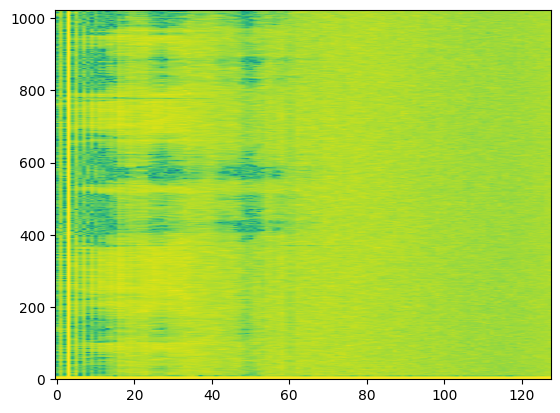

In [8]:
spec.plot()